# Master OLLA Integrator

This file has the integrator and actual OLLA processing code. OLLA takes a .nc file of forcing and outputs the temperature time series. 

In [1]:
import numpy as np 
import xarray as xr 

In [2]:
def getOLLA(filename):
    
    forcing = xr.open_dataset(filename)
    
    F_solar = forcing["F_solar"].values
    t_upper = forcing["t_upper"].values
    q_upper = forcing["q_upper"].values
    percip = forcing["precip"].values
    cf = forcing["c_f"].values
    
    ### NEED A FAT UNITS CHECK ON THE ABOVE DATA TO MAKE SURE WE'RE NOT MESSING UP UNITS ###
    
    temp_series, mois_seris = getIntegration(F_solar, precip)
    
    return temp_series, mois_series

In [ ]:
def getIntegration(F_solar, precip):
    
    N_summers = len(F_solar.shape[0])
    N_minutes = len(F_solar.shape[1])
    
    temp_series = np.zeros((N_summers, N_minutes))
    mois_series = np.zeros((N_summers, N_minutes))
    
    for i in range(1, N_summers): # loop through summers
        
        for j in range(0, N_minutes): # loop through minutes
            
            temp_series[i,j] = temp_series[i,j-1] + getTempFlux(temp_series[i,j-1], mois_series[i,j-1], F_solar[i,j-1])
            mois_series[i,j] = mois_series[i,j-1] + getMoisFlux(temp_series[i,j-1], mois_series[i,j-1], precip[i,j-1])
    
    return temp_series, mois_series

In [8]:
def getTempFlux(T, m, F, q):
    
    L = 2.5 * 10**6 # latent heat of evaporation
    T_0 = 273.15 # freezing temperature
    R_w = 461.25 # specific gas constant for water 
    e_s_0 = 6.11 # hPa; constant in front of clausius clapeyron relation
    P_surf = 1013.25 #hPa; surface pressure 
    C = 4180. # heat capacity of water
    q = 0.5
    
    alpha = 10. # radiative feedback
    v = 10**(-2) # density of air divided by surface resistance
    
    exp_arg = L * R_w**(-1) * (T_0**(-1) - T**(-1))
    sat_humidity = 0.622 * e_s_0 * P_surf**(-1) * np.exp(exp_arg)
    
    temp_flux = F - alpha(T - T_0) - L * v * m * (sat_humidity - q)
    
    return C**(-1) * temp_flux

In [7]:
def getMoisFlux(T, m, precip, q):
    
    L = 2.5 * 10**6 # latent heat of evaporation
    T_0 = 273.15 # freezing temperature
    R_w = 461.25 # specific gas constant for water 
    e_s_0 = 6.11 # hPa; constant in front of clausius clapeyron relation
    P_surf = 1013.25 #hPa; surface pressure 
    mu = 50. # density of water * soil column depth * porisity of soil
    q = 0.5
    
    alpha = 10. # radiative feedback
    v = 10**(-2) # density of air divided by surface resistance
    
    exp_arg = L * R_w**(-1) * (T_0**(-1) - T**(-1))
    sat_humidity = 0.622 * e_s_0 * P_surf**(-1) * np.exp(exp_arg)
    
    mois_flux = precip - v * m (sat_humidity - q)
    
    return mu**(-1) * mois_flux

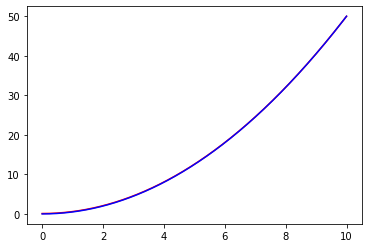

In [9]:
# Newtonian proof of concept

import numpy as np
import matplotlib.pyplot as plt

y = np.zeros(1000)

x = np.linspace(0, 10, 1000)

for i in range(0, len(y)):
    y[i] = y[i-1] + x[i-1] * .01
    
plt.plot(x, y, color='r')
plt.plot(x, 0.5*x**2, color='b')
